In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)


In [3]:
df = pd.read_csv('weight-height.csv')
df.sample(5)

,Gender,Height,Weight
9188,Female,61.109387,111.734742
3440,Male,69.716554,181.942890
1373,Male,67.968565,192.059874
4153,Male,71.743675,197.936832
2544,Male,69.458663,187.910876


In [4]:

df =  df[['Height', 'Gender']]
df.sample(5)

,Height,Gender
3941,69.827488,Male
1092,71.620286,Male
786,63.309969,Male
8084,66.862739,Female
7129,58.823262,Female


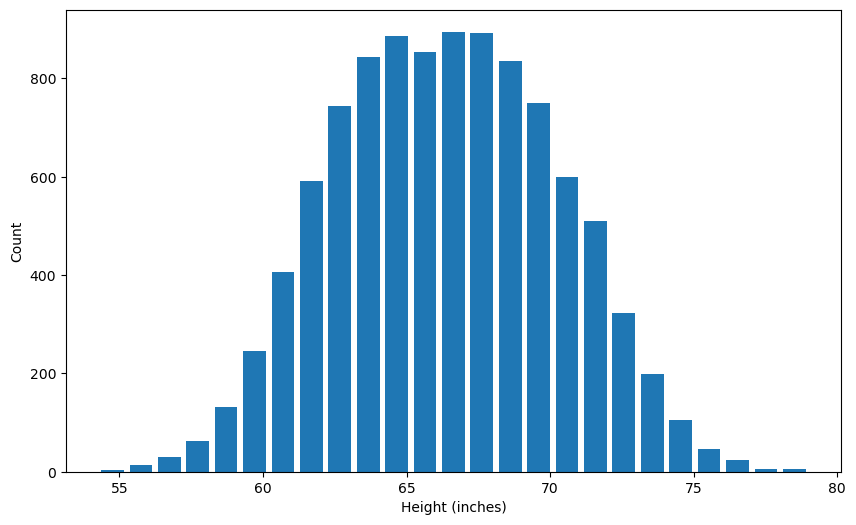

In [5]:
plt.hist(df.Height, bins=25, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

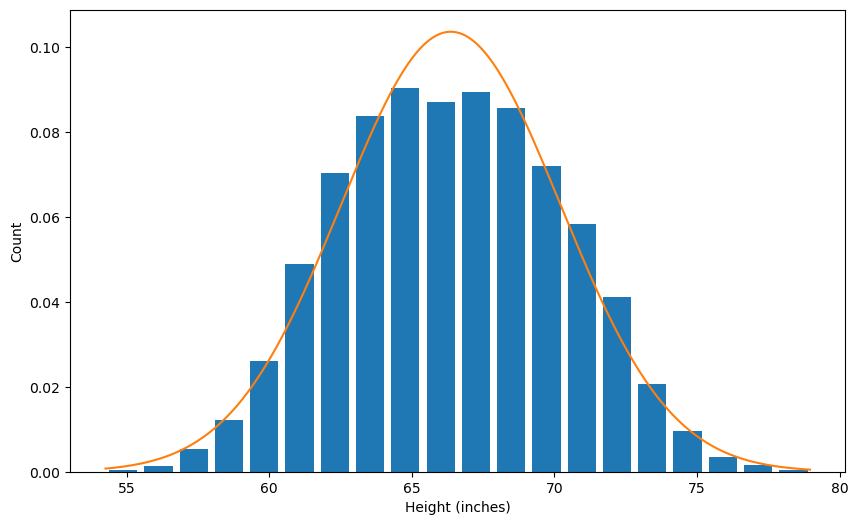

In [6]:
from scipy.stats import norm
import numpy as np

plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.Height.mean(), df.Height.std()))


In [7]:
upper_limit = df.Height.mean()+ 3* df.Height.std()
upper_limit

77.91014411714094

In [8]:
lower_limit = df.Height.mean() - 3* df.Height.std()
lower_limit

54.82497539250154

In [9]:
df[(df.Height > upper_limit) | (df.Height< lower_limit)]


,Height,Gender
994,78.095867,Male
1317,78.462053,Male
2014,78.998742,Male
3285,78.528210,Male
3757,78.621374,Male
6624,54.616858,Female
9285,54.263133,Female


In [10]:
df_no_outlier_std_dev=df[(df.Height < upper_limit) & (df.Height> lower_limit)]

In [11]:
df_no_outlier_std_dev.shape

(9993, 2)

In [12]:
df.shape[0] - df_no_outlier_std_dev.shape[0]

7

# Calculate Z Score

# Z = (x- u)/ zigma
# u = mean
# zigma = standard deviation

In [15]:
df['Z-Score'] = (df.Height - df.Height.mean()) / df.Height.std()

In [17]:
df.head()

,Height,Gender,Z-Score
0,73.847017,Male,1.943964
1,68.781904,Male,0.627505
2,74.110105,Male,2.012343
3,71.730978,Male,1.393991
4,69.881796,Male,0.913375


In [18]:
df[df['Z-Score']>3]

,Height,Gender,Z-Score
994,78.095867,Male,3.048271
1317,78.462053,Male,3.143445
2014,78.998742,Male,3.282934
3285,78.528210,Male,3.160640
3757,78.621374,Male,3.184854


In [19]:
df[df['Z-Score']<-3]

,Height,Gender,Z-Score
6624,54.616858,Female,-3.054091
9285,54.263133,Female,-3.146027


In [20]:
df[(df['Z-Score']<3 | (df['Z-Score']>-3))]

,Height,Gender,Z-Score
1,68.781904,Male,0.627505
4,69.881796,Male,0.913375
5,67.253016,Male,0.230136
6,68.785081,Male,0.628331
7,68.348516,Male,0.514865
...,...,...,...
9995,66.172652,Female,-0.050658
9996,67.067155,Female,0.181830
9997,63.867992,Female,-0.649655
9998,69.034243,Female,0.693090
